In [1]:
import pandas as pd
df=pd.read_csv('processed_final.csv')
df

,Product Name,Original_Price,Offer_Price,Stars_out_of_5,Ratings,Flipkart_Assured,Specification,Color,Reviews,Discount,Brand,5G_Support,Battery_mAh,RAM,ROM,No of Colors
0,POCO C55,13999,6499,4.2,120063,1,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,"power black, forest green, cool blue",7327,1,poco,0,5000.0,6,128,3
1,Motorola G34 5G,14999,11999,4.2,12852,1,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,"charcoal black, ice blue, ocean green",1601,1,motorola,1,5000.0,8,128,3
2,Motorola G34 5G,14999,11999,4.2,12852,1,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,"charcoal black, ice blue, ocean green",1601,1,motorola,1,5000.0,8,128,3
3,POCO C51,9999,5499,4.0,190137,1,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,"royal blue, power black",10661,1,poco,0,5000.0,4,64,2
4,POCO C51,10999,5999,4.1,7363,1,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"royal blue, power black",405,1,poco,0,5000.0,6,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,OPPO A33,0,12990,4.4,51890,1,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,mint cream,3352,0,oppo,0,5000.0,3,32,1
561,vivo X100 Pro,96999,89999,4.7,410,1,16 GB RAM | 512 GB ROM17.22 cm (6.78 inch) Ful...,asteroid black,126,1,vivo,0,5400.0,16,512,1
562,Tecno Phantom X2 Pro,61999,44998,4.1,14,1,12 GB RAM | 256 GB ROM17.27 cm (6.8 inch) Full...,stardust grey,1,1,tecno,0,5160.0,12,256,1
563,itel Vision 3,9271,5990,4.0,765,1,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...,jewel blue,61,1,itel,0,5000.0,3,64,1


In [2]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df.dropna(inplace=True)
df.drop(columns = ['Specification'], inplace = True)


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

encoded = le.fit_transform(df['Product Name'])
df['Product Name'] = encoded
encoded = le.fit_transform(df['Brand'])
df['Brand'] = encoded
encoded = le.fit_transform(df['Color'])
df['Color'] = encoded
df

,Product Name,Original_Price,Offer_Price,Stars_out_of_5,Ratings,Flipkart_Assured,Color,Reviews,Discount,Brand,5G_Support,Battery_mAh,RAM,ROM,No of Colors
0,110,13999,6499,4.2,120063,1,182,7327,1,15,0,5000.0,6,128,3
1,59,14999,11999,4.2,12852,1,35,1601,1,11,1,5000.0,8,128,3
2,59,14999,11999,4.2,12852,1,35,1601,1,11,1,5000.0,8,128,3
3,108,9999,5499,4.0,190137,1,192,10661,1,15,0,5000.0,4,64,2
4,108,10999,5999,4.1,7363,1,192,405,1,15,0,5000.0,6,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,79,0,12990,4.4,51890,1,153,3352,0,14,0,5000.0,3,32,1
561,261,96999,89999,4.7,410,1,7,126,1,20,0,5400.0,16,512,1
562,204,61999,44998,4.1,14,1,215,1,1,19,0,5160.0,12,256,1
563,241,9271,5990,4.0,765,1,124,61,1,7,0,5000.0,3,64,1


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

# SVM for classification

In [6]:
X = df.drop(columns=['Brand', 'Stars_out_of_5', 'Ratings', 'Reviews', 'Discount', 'Battery_mAh'])
y=df['Brand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)


accu = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accu)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7610619469026548
Precision: 0.804646017699115
Recall: 0.7610619469026548
F1 Score: 0.7599005317126626


C:\Users\reeth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# K Fold

In [7]:
X = df[['Original_Price', 'Stars_out_of_5', 'Ratings', 'Reviews', 'Discount', 'Battery_mAh']]
y = df['Brand']

svm_classifier = SVC(kernel='linear')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X_scaled, y, cv=kf)
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")
mean_cv_score = cv_scores.mean()
print(f"\nMean Cross-Validation Score: {mean_cv_score:.2f}")

Fold 1: Accuracy = 0.39
Fold 2: Accuracy = 0.29
Fold 3: Accuracy = 0.39
Fold 4: Accuracy = 0.24
Fold 5: Accuracy = 0.36

Mean Cross-Validation Score: 0.33


# Grid Search

In [8]:
param_grid = {
    'C': [0.1, 1, 10],               
    'gamma': [0.1, 0.01, 0.001],     
    'kernel': ['linear', 'rbf','poly']     
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

C:\Users\reeth\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.8672566371681416


# SVM Regressor

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_regressor = SVR(kernel='rbf')  
svm_regressor.fit(X_train_scaled, y_train)
y_pred = svm_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 16.21239908361512


# K Fold

In [10]:
svm_regressor = SVR(kernel='linear')  
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Negative Mean Squared Error = {score:.2f}")
mean_cv_score = cv_scores.mean()
print(f"\nMean Negative Mean Squared Error: {mean_cv_score:.2f}")

Fold 1: Negative Mean Squared Error = -36.76
Fold 2: Negative Mean Squared Error = -25.09
Fold 3: Negative Mean Squared Error = -28.89
Fold 4: Negative Mean Squared Error = -29.05
Fold 5: Negative Mean Squared Error = -26.59

Mean Negative Mean Squared Error: -29.28


# Grid Search

In [11]:
param_grid = {
    'C': [0.1, 1, 10],              
    'epsilon': [0.1, 0.01, 0.001],   
    'gamma': ['scale', 'auto']       
}

grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
mse = -grid_search.best_score_  
print("Best Mean Squared Error:", mse)
mse_test = -grid_search.score(X_test_scaled, y_test)  
print("Mean Squared Error on Test Set:", mse_test)

Best Hyperparameters: {'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}
Best Mean Squared Error: 14.416924482004521
Mean Squared Error on Test Set: 18.739820205804445


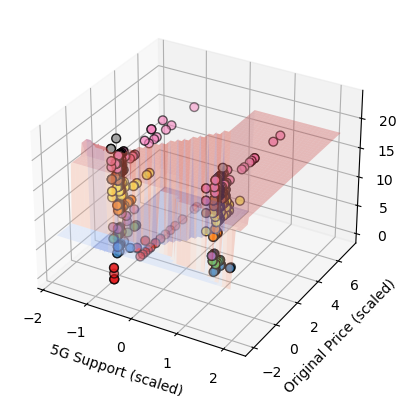

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

selected_features = ['5G_Support', 'Original_Price', 'Brand']
X_selected = df[selected_features]

X = X_selected[['5G_Support', 'Original_Price']]
y = X_selected['Brand']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svc = SVC(kernel='linear')
svc.fit(X_scaled, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('5G Support (scaled)')
ax.set_ylabel('Original Price (scaled)')
ax.set_zlabel('Brand')

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.3)

plt.show()


Is 5G Support available? (yes/no):  yes
Enter the price:  90000


C:\Users\reeth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Brand: samsung


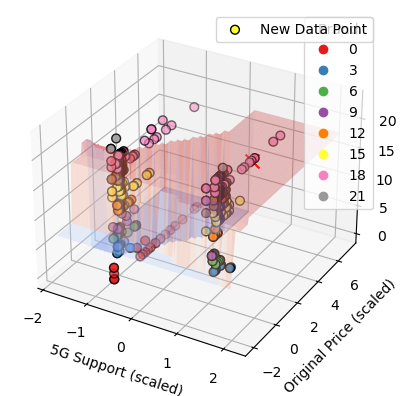

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df = pd.read_csv('processed_final.csv')

selected_features = ['5G_Support', 'Original_Price', 'Brand']
X_selected = df[selected_features]


X = X_selected[['5G_Support', 'Original_Price']]
y = X_selected['Brand']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()


y_encoded = label_encoder.fit_transform(y)

svc = SVC(kernel='linear')
svc.fit(X_scaled, y_encoded)

g5_support_input = input("Is 5G Support available? (yes/no): ").lower()
price_input = float(input("Enter the price: "))

g5_support = 1 if g5_support_input == 'yes' else 0
new_data_point = np.array([[g5_support, price_input]])
new_data_point_scaled = scaler.transform(new_data_point)
predicted_brand_encoded = svc.predict(new_data_point_scaled)[0]
predicted_brand = label_encoder.inverse_transform([predicted_brand_encoded])[0]
print("Predicted Brand:", predicted_brand)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y_encoded, c=y_encoded, cmap='Set1', edgecolor='k', s=40)

ax.scatter(new_data_point_scaled[:, 0], new_data_point_scaled[:, 1], predicted_brand_encoded, c='red', marker='x', s=100, label='New Data Point')

ax.set_xlabel('5G Support (scaled)')
ax.set_ylabel('Original Price (scaled)')
ax.set_zlabel('Brand')

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.3)

legend1 = ax.legend(*scatter.legend_elements(), title="Brand")
ax.add_artist(legend1)
ax.legend(['New Data Point'], loc='upper right')

plt.show()

In [14]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import plotly.io as pio
pio.renderers.default = 'browser'

df = pd.read_csv('processed_final.csv')

selected_features = ['5G_Support', 'Original_Price', 'Brand']
X_selected = df[selected_features]
X = X_selected[['5G_Support', 'Original_Price']]
y = X_selected['Brand']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
svc = SVC(kernel='linear')
svc.fit(X_scaled, y_encoded)
g5_support_input = input("Is 5G Support available? (yes/no): ").lower()
price_input = float(input("Enter the price: "))

g5_support = 1 if g5_support_input == 'yes' else 0
new_data_point = np.array([[g5_support, price_input]])
new_data_point_scaled = scaler.transform(new_data_point)
predicted_brand_encoded = svc.predict(new_data_point_scaled)[0]
predicted_brand = label_encoder.inverse_transform([predicted_brand_encoded])[0]
print("Predicted Brand:", predicted_brand)

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    z=y_encoded,
    mode='markers',
    marker=dict(
        size=4,
        color=y_encoded,
        colorscale='Viridis',
        opacity=0.8,
        line=dict(
            width=0.5,
            color='black'
        )
    ),
    name='Existing Data Points'
))
fig.add_trace(go.Scatter3d(
    x=new_data_point_scaled[:, 0],
    y=new_data_point_scaled[:, 1],
    z=[predicted_brand_encoded],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        opacity=1,
        symbol='cross'
    ),
    name='New Data Point'
))
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig.add_trace(go.Surface(x=xx, y=yy, z=Z, opacity=0.5, colorscale='Viridis')) # Change colorscale here
fig.update_layout(
    scene=dict(
        xaxis_title='5G Support (scaled)',
        yaxis_title='Original Price (scaled)',
        zaxis_title='Brand',
        aspectmode='cube',
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

Is 5G Support available? (yes/no):  yes
Enter the price:  140000


C:\Users\reeth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Brand: samsung
